In [ ]:
import os
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns

In [ ]:
# # local
# path = "results/"
# year = "2014"
# for file in os.listdir(path):
#     if file == year:
#         df = pd.read_csv(path+file+"/results.csv")
#         print("Nam " + year +" kich thuoc :",df.shape)

In [ ]:
# drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
year = "2014"
df = pd.read_csv("/content/drive/MyDrive/Project /results.csv")
print("Nam " + year +" kich thuoc :",df.shape)

Nam 2014 kich thuoc : (31984, 21)


# Boston Marathon
* Ellbow method

In [ ]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31984 non-null  object 
 1   name       31984 non-null  object 
 2   division   31984 non-null  int64  
 3   25k        31984 non-null  object 
 4   gender     31984 non-null  object 
 5   age        31984 non-null  int64  
 6   official   31984 non-null  float64
 7   bib        31984 non-null  object 
 8   genderdiv  31984 non-null  int64  
 9   ctz        1244 non-null   object 
 10  35k        31984 non-null  object 
 11  overall    31984 non-null  int64  
 12  pace       31984 non-null  float64
 13  state      29408 non-null  object 
 14  30k        31984 non-null  object 
 15  5k         31984 non-null  object 
 16  half       31984 non-null  object 
 17  20k        31984 non-null  object 
 18  country    31984 non-null  object 
 19  city       31983 non-null  object 
 20  40k   

## EDA

* Detail data: 
    * Include: 31984 Rows, 21 Columns.
    * dtype: 2 float64 , 4 int64 and 15 object.
    * Missing Columns: `ctz`, `state` and `city`.
* Note: 
    * `5k, 10k,20k ,25k ,30k,35k ,40k`: run time(km).
    *  `division`: division place.(division winners)
    * `half` : Runner's time at halfway point
    * `overall` : ranking finishing
    * `official` : official time
    * `bib` :Assigned race number based on qualifying time.
    * `pace` : tốc độ (minute/mile)
    * `genderdiv` :thứ hạng trong giới tính
    * `ctz` : Runner's nationality 

In [ ]:
# attribute unique 
df.apply(lambda x: len(x.unique()))

10k           2766
name         31915
division      6979
25k           6570
gender           2
age             64
official     11030
bib          31984
genderdiv    17575
ctz             85
35k           9516
overall      31931
pace           727
state           69
30k           8090
5k            1491
half          5651
20k           5375
country         78
city          5935
40k          10546
dtype: int64

* Inside, attribute `bib` is keys table, and các số lượng các vận động viên gần như khác nhau `name`.

In [ ]:
# check dtype columns
for i in df["5k"].unique():
    try:
        float(i)
    except: 
        print(i)

-


In [ ]:
df = df.replace("-",np.nan)

In [ ]:
object_col = df.select_dtypes(include=['object'])
for col in object_col:
    try: 
        df[col] = df[col].astype(float)
        print(col)
    except:
        continue

10k
25k
35k
30k
5k
half
20k
40k


In [ ]:
df = df.fillna(df.mean())

In [ ]:
# statistic attribute
pd.set_option('float_format', '{:0.2f}'.format)
df.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00
mean,51.80,1932.56,133.61,42.41,243.00,8051.04,196.86,15939.59,9.28,164.57,25.76,111.66,105.71,229.00
std,8.96,1715.23,25.51,11.32,52.30,4754.01,41.96,9232.98,1.99,33.93,4.32,21.04,19.76,49.13
min,16.62,1.00,45.80,18.00,80.60,1.00,67.42,1.00,3.08,56.45,7.75,38.03,36.10,76.10
25%,45.42,610.00,115.57,33.00,205.53,3972.00,167.15,7943.75,7.85,140.69,22.65,96.87,91.77,193.83
50%,50.35,1425.00,129.07,42.00,232.37,7970.00,188.22,15939.50,8.87,157.78,25.10,107.88,102.18,218.90
75%,57.15,2611.00,147.56,50.00,273.24,11968.00,220.12,23935.25,10.43,182.79,28.45,123.03,116.48,257.40
max,112.38,6979.00,289.02,81.00,538.88,17575.00,449.33,31931.00,20.57,376.38,86.95,236.67,224.35,508.35


* Nhìn chung dữ liệu numerical phân bố khá đều.
* Độ tuổi tham gia khá rộng trải dài từ 18 đến 81 tuổi.

In [ ]:
df.describe(include= "O")
# silhouette_score

,name,gender,bib,ctz,state,country,city
count,31984,31984,31984,1244,29408,31984,31983
unique,31915,2,31984,84,68,78,5934
top,"Murphy, John E.",M,34581,GBR,MA,USA,Boston
freq,2,17617,1,171,7587,27233,1034


* Phần lớn cuộc thi diễn ra ở Mỹ.
* Khá lớn dữ liệu thời gian bị thiếu với giá trị là `-`.
* Một số thí sinh thi 2 lần.
* Số lượng thí sinh nam nữ thi khá cân bằng.
* ...

## Preprocessing data

In [ ]:
df[["ctz","state","city"]].isnull().sum(axis = 0)

ctz      30740
state     2576
city         1
dtype: int64

In [ ]:
data = df.drop("ctz",axis = 1).dropna(axis = 0)
data.shape

(29408, 20)

In [ ]:
object_col = data.select_dtypes(include=['object'])
object_col = object_col.drop(["name","bib","city","state"],axis = 1)

In [ ]:
dummi = pd.get_dummies(object_col, prefix=object_col.columns)
dummi.head()

,gender_F,gender_M,country_CAN,country_USA
9,0,1,0,1
14,0,1,1,0
15,1,0,0,1
24,0,1,1,0
27,0,1,0,1


In [ ]:
# data.loc[:, data.columns.str.startswith("life")]
col_del = data.filter(regex='k$',axis=1).columns

In [ ]:
numerical = data.select_dtypes(exclude=['object']).drop(col_del,axis =1)
numerical.apply(lambda x: len(x.unique()))

division      6953
age             64
official     10739
genderdiv    17216
overall      29387
pace           710
half          5556
dtype: int64

In [ ]:
data_new = pd.concat([numerical,dummi],axis = 1) 
data_new.shape

(29408, 11)

In [ ]:
data_new1 = pd.concat([numerical[["age","pace"]],dummi],axis = 1) 
data_new1.shape

(29408, 6)

In [ ]:
from sklearn.preprocessing import StandardScaler
data_stand = StandardScaler().fit_transform(data_new)

In [ ]:
from sklearn.preprocessing import StandardScaler
data_stand1 = StandardScaler().fit_transform(data_new1)

Specifically, use the tools at hand to determine which clustering
solution, including number of clusters and algorithm used, is best for
the marathon data. Once you have a solution you like, write a data
story, including visualizations, where you teach the reader something
about the Boston Marathon based on your clusters. Write up your
report, including your process from start to finish. You must include
analysis as:
1. Draw bar graphs (both male & female in different color) for each
cluster for male and female, from the bar graphs, you can tell things
as which cluster contains the most number of female (or male).
2. Draw bar graphs for runners in different ranges of age (dividing by 3
groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors),
from the graph, you should be able to anwser which cluster contains
the most young people, which cluster contains oldest people, etc.
3. Do the same things as above for finishing time (which group runs
fastest).

In [ ]:
t0 = time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
data_tsne = tsne.fit_transform(data_stand)
print("Execution time:",time() - t0)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 29408 samples in 0.106s...
[t-SNE] Computed neighbors for 29408 samples in 2.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29408
[t-SNE] Computed conditional probabilities for sample 2000 / 29408
[t-SNE] Computed conditional probabilities for sample 3000 / 29408
[t-SNE] Computed conditional probabilities for sample 4000 / 29408
[t-SNE] Computed conditional probabilities for sample 5000 / 29408
[t-SNE] Computed conditional probabilities for sample 6000 / 29408
[t-SNE] Computed conditional probabilities for sample 7000 / 29408
[t-SNE] Computed conditional probabilities for sample 8000 / 29408
[t-SNE] Computed conditional probabilities for sample 9000 / 29408
[t-SNE] Computed conditional probabilities for sample 10000 / 29408
[t-SNE] Computed conditional probabilities for sample 11000 / 29408
[t-SNE] Computed conditional probabilities for sample 12000 / 29408
[t-SNE] Computed conditional probabilities for sam

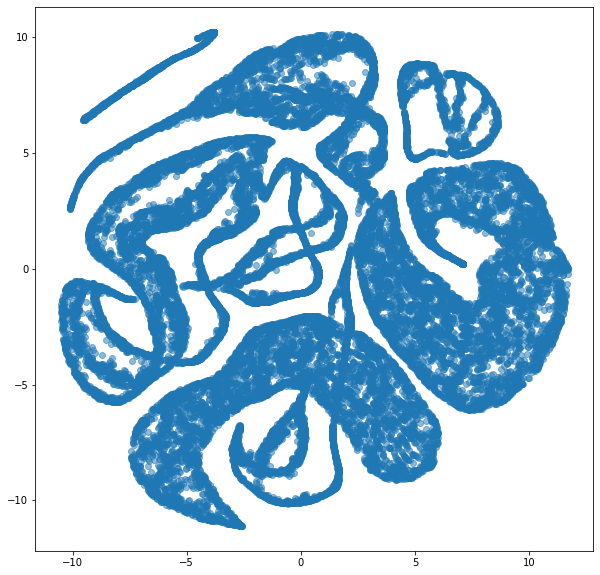

In [ ]:
df_tsne = pd.DataFrame(data_tsne, columns= ["0","1"])
plt.figure(figsize = (10,10))
plt.scatter("0","1",data = df_tsne,alpha = 0.5)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_stand)
data_pca = pca.transform(data_stand)

In [ ]:
object_col.apply(lambda x: len(x.unique()))

gender      2
state      68
country     2
dtype: int64

### Kmeans

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, random_state=0).fit(data_tsne)

In [ ]:
kmeans.labels_

array([2, 1, 1, ..., 1, 1, 3], dtype=int32)

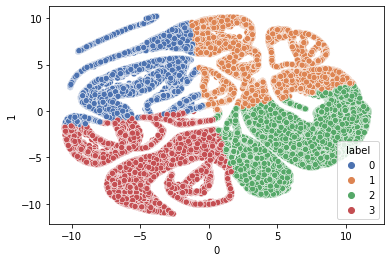

In [ ]:
df_tsne["label"] = kmeans.labels_
sns.scatterplot(data=df_tsne, x="0", y="1", hue="label", palette="deep")

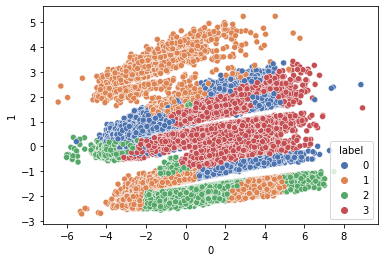

In [ ]:
df_pca = pd.DataFrame(data_pca, columns= ["0","1"])
df_pca["label"] = kmeans.labels_
sns.scatterplot(data=df_pca,x="0", y="1", hue="label", palette="deep")

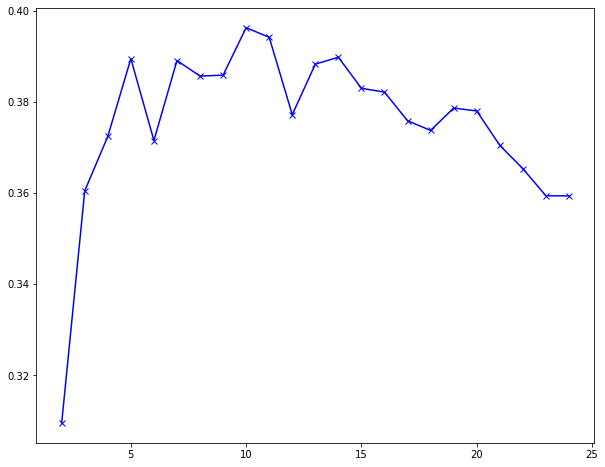

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist 
distortions = []
sil_score = []
iner = []
select_k = range(2,25)
for k in select_k:

  kmeans = KMeans(n_clusters=k).fit(data_stand)
  kmeans.fit(data_stand) 
  labels = kmeans.labels_
  sil_score.append(metrics.silhouette_score(data_stand, labels))
  iner.append(kmeans.inertia_)
  distortions.append(sum(np.min(cdist(data_stand, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / data_stand.shape[0]) 

plt.figure(figsize = (10,8))
plt.plot(select_k,sil_score,'bx-')

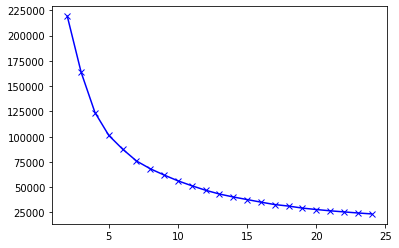

In [ ]:
plt.plot(select_k,iner,'bx-')

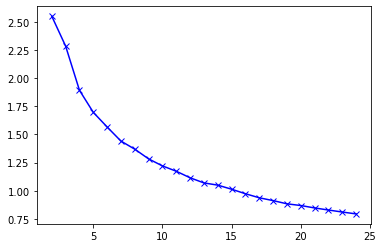

In [ ]:
plt.plot(select_k,distortions,'bx-')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe52e355c18>,
                 k=None, metric=None, model=None, timings=False)

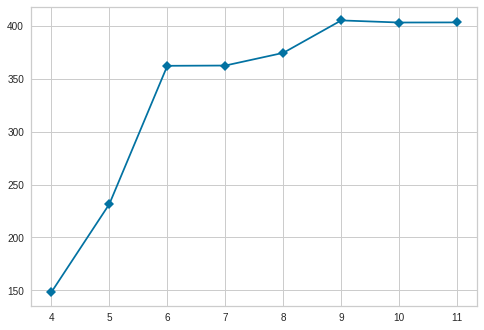

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(4,12), timings=False)
visualizer.fit(data_stand)        # Fit the data to the visualizer

### DBCAN

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=2).fit(data_pca)

In [ ]:
labels  = db.labels_
print(set(labels))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

{0, 1, 2, 3, 4, -1}


In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Silhouette Coefficient: 0.201


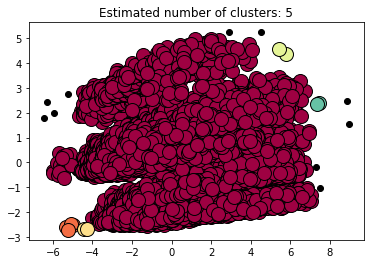

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_pca, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=20).fit(data_tsne)

In [ ]:
labels  = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Silhouette Coefficient: -0.189
SO mau noise:  254


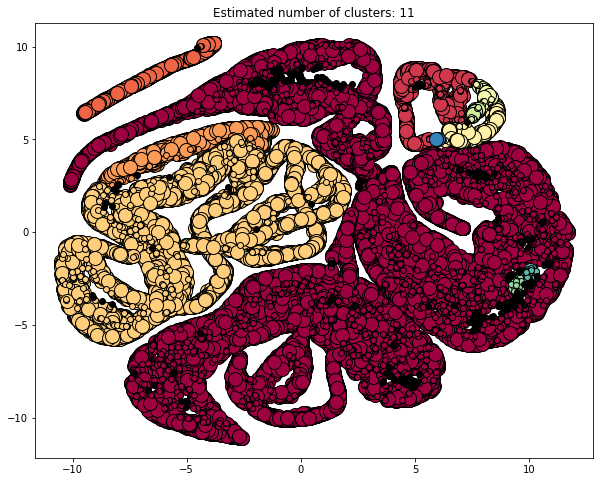

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_tsne, labels))
print("SO mau noise: ",n_noise_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_tsne[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_tsne[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

###  SpectralClustering

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=2,random_state=0).fit(data_pca)
clustering.labels_
# full ram ??

### Gaussian mixtures

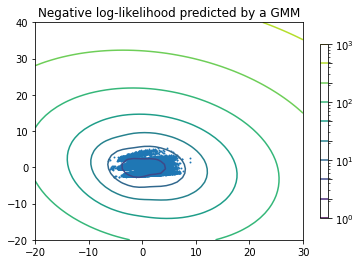

In [ ]:
from matplotlib.colors import LogNorm
from sklearn import mixture
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(data_pca)


# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(data_pca[:, 0], data_pca[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

# Insight cluster

* Theo nhu cac phuong phap tren thi so cluster phu hop trong khoang 5-10
* Va hinh dang cau truc du lieu la nhung duong cong.
** Do do, chon phuong Phap DBSCAN de thuc hien cluster.

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=20).fit(data_stand) # 0.5 :20 , 2:5  ,0.7:10 , 0.7:20, 
labels  = db.labels_
print(set(labels))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_stand, labels))
print("Estimated number of noise: ",n_noise_)
print('Estimated number of clusters: %d' % n_clusters_)



{0, 1, 2, 3, -1}
Silhouette Coefficient: 0.304
Estimated number of noise:  756
Estimated number of clusters: 4


In [ ]:
pd.DataFrame(labels,columns=["0"]).value_counts()

0 
 0    14174
 1    12620
 2     1052
 3      806
-1      756
dtype: int64

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=2).fit(data_stand1) # 5 ,50: 6,30 - 0.476: 7 ,10  - 0.433:6 ,5 : 0.48
labels  = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_stand1, labels))
print("Estimated number of noise: ",n_noise_)
print('Estimated number of clusters: %d' % n_clusters_)

In [ ]:
data_float = data.select_dtypes(exclude = ["object"])
data_obj = data.select_dtypes(include=["object"])
data_float["labels"] = db.labels_
data_obj["labels"] = db.labels_
data_obj.groupby("labels").agg(lambda x: x.value_counts().index[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,name,gender,bib,state,country,city
labels,,,,,,
-1,"Kasle, Sean T.",M,17834,MA,USA,Toronto
0,"Noonan, Joe",M,19281,MA,USA,Boston
1,"Clark, Amy B.",F,24579,MA,USA,Boston
2,"Girard, Mathieu",M,9136,ON,CAN,Toronto
3,"Hartford, Renee",F,20783,ON,CAN,Toronto


In [ ]:
data_float.groupby("labels").agg(["mean"])

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
labels,,,,,,,,,,,,,,
-1,62.13,2415.16,157.43,47.66,327.31,13322.50,261.46,25903.25,12.47,213.61,30.37,139.85,130.78,301.82
0,49.62,1816.76,127.74,43.75,232.77,8775.30,187.75,13912.67,8.89,156.75,24.74,106.49,100.85,219.25
1,54.56,2274.05,141.44,39.12,254.74,7191.30,207.50,18503.29,9.72,173.89,27.08,117.95,111.71,240.63
2,46.31,991.45,117.74,48.69,210.31,6836.96,170.51,9695.33,8.03,143.42,23.13,98.71,93.53,198.11
3,51.49,1015.07,131.85,44.97,234.32,5616.88,191.20,15636.33,8.95,160.85,25.65,110.26,104.46,221.19


# Conclusion